# model02rpt
### Un altro passo: sono arrivate le banche e la banca centrale pure!
#### Sempre in azione l'*Istituto Centrale di Statistica* con a fianco la *Banca d'Italia*

use it in [Notebook viewer](https://nbviewer.org/github/terna/ejmmp/blob/main/model02/model02rpt.ipynb) or explore it in [GitHub](https://github.com/terna/ejmmp/tree/main/model02) (with several *.py files)

to force the update if missing, follow once [Notebook viewer and flush cache](https://nbviewer.org/github/terna/ejmmp/blob/main/model02/model02rpt.ipynb?flush_cache=true)

[Wikipedia as a memo](https://en.wikipedia.org/wiki/Stock-flow_consistent_model#cite_note-42)

In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import random as r
import matplotlib.pyplot as plt
import commonVar as cmv
import numpy as np
from tools import *
from metaActions import *
from generateSeeds import *
from plot import *
from initSeries import *
import sys

### Stock-flow *model02*, with real and financial elements

- We observe both the real and monetary sides of the economy.

  

- We consider loans and deposits, with their interests.

  

- Enterprises have initial endowments.

  

- When agents abstein from consuming, their savings increase liquidity.

  

- Investments are uniquely for replacement, without technical progress.

  

- We use specific random sequences for both each agent and each function.

### symbol table

[symbol table](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) in $\LaTeX$

$a_i$ -  with $a_i \in \mathbf{A}$; agent number $N=|\mathbf{A}|$, `agentList` and`agentNum`

$a^e_i$ -  with $a^e_i \in \mathbf{A^e}$ and $\mathbf{A^e} \subset \mathbf{A}$; employer number $N^e=|\mathbf{A^e}|$ in range $[N^e_{min},N^e_{max}]$, `employerList`

$\mathbf{F}$ - firms' set, with $f_j \in \mathbf{F}$ being $N^f = |\mathbf{F}|$,  with $N^f = |\mathbf{F}| = |\mathbf{A^e}|$ , `firmList`

$\mathbf{A}^w$ - working agents' set, being $\mathbf{A}^w \subseteq \mathbf{A}$, with $N^w_{i,t}=|\mathbf{A}^w_i|$ number of working agents employed by employer $i$ at time $t$, also including self-employed employers, with $a_i \in \mathbf{A}^e$

$\mathbf{B}$ - banks' set, with $b_j \in \mathbf{B}$ being $N^b = |\mathbf{B}|$, `bankList`

$x^d$ - interest rate on deposits, `interestRateOnDeposits`

$x^{l^a}$ - interest rate on loans to (private) agents, `interestRateOnLoansVsAgents`

$x^{l^f}$ - interest rate on loans to firms, `interestRateOnLoansVsFirms`

$X^d_{a|f|b}$ - amount of positive interest on deposits for a given interval $t$ for agents $a$ or firms $f$, and negative for banks $b$, `interestOnDeposits`

$X^l_{a|f|b}$ - amount of negative interest on loans for a given interval $t$ for agents $a$ or firms $f$, and positive for banks $b$, `interestOnLoans`

$p$ - price `price`

$u$ - unemployment rate `unemploymentRate`

$dimensional~heterogeneity$ is a $true/false$ chooser, forcing increasing firms to attract more workers. `dimensionalHeterogeneity`

$\pi_{i,t}$ - labor productivity, a uniformly distributed decimal number in range $[\pi_{min},\pi_{max}]$,`productivity`

$\Delta\pi_{i,t}$ - uniperiodal additive productivity correction in range $[\Delta\pi_{min},\Delta\pi_{max}]$, `productivityDelta`

$q_{i,t}$ - production in quantity, `production`

$\Pi_{i,t}$ - profit, `profit`

$\rho$ - profit distribution share, `rho`

$\delta_{i,t}$ - dividend $\rho\Pi_{i,t}$, `dividend` or `perceivedDividend` 

$W$ - wage `wage`

$R_{i,t}$ - revenues, `revenues`, including both sales revenues, `salesRevenues`, and active interests 

$s_{i,t}$ - sales in quantity, `sales`

$v_{i,t}$ - in**v**entories (final, initial), `initialInventories`, `finalInventories`

$d_{i}$ - deperibility share of the production, `deperibilityShare`, setting $d_{max}$

$c_{i,t}$ - consumption rate, a uniformly distributed decimal number in range $[c_{min},c_{max}]$,`consumptionRate`

$C_{i,t}$ - consumption of $i$ in $t$

$I_{i,t}$  - investment plan  of $i$ in $t$, a uniformly distributed realization in range $[I_{min},I_{max}]$,`investmentProgram`

$\lambda$ -parameter limiting the investment plan, in $I_{i,t} \le \lambda\Pi_{i,t-1}$ , `Lambda`

$H_{i,t}$  - high powered money (cash) held by individuals (also acting as employers), `cashMoney`

$M1_{i,t}$ - checking account money deposits held by  $a_i$ at time $t$, `checkingAccount`

$M1^f_{i,t}$ - firm's bank account (with positive or negative balance), `bankAccount`

$M1^b_{i,t}$ - bank's account (with positive or negative balance) mantained with the central bank , `centralBankAccount`

$\alpha$ - parameter determining the mean of the random normal distribution of the initial endowments of both firms and banks as $\alpha N^w_i$, being $i$ a firm or a bank, `alphaF` or `alphaB`

$\beta$ - parameter determining the standard deviation $\sigma$ of the random normal distribution of the initial endowments of both firms and banks, with $\sigma=\frac{\alpha}{\beta}N^w_i$, being $i$ a firm or a bank, `beta`

the investment and consumption actions are repeated in each cycle, looking around randomly for the sellers; currently `nOfConsumptionActions` $=30$ and `nOfInvestmentActions`$=10$; each consumption buy action is at maximum the 20% of the planned consumptions in that cycle; instead, each investment buy action can reach the whole amount of the investment program of the cycle; each buy action is limited by the residual capabilty of the seller

**magically**, the same good can be a consumption item or an investment one

$T$ - number of cycles `ncycles`

$t$ - current cycle `cycle`


## agent structure

The structure of an **agent**: it can represent an entrepreneur, a worker, an unemployed person.

When an agent is created, the **initialization process** defines:

- its numerical id, `num`
- its entrepreneur status, `entrepreneur`, set to $false$
- the id of its employer, `myEmployer`, set to $0$
- if entrepreneur, the id of its firm, `myFirm`, set to $0$
- $c_{i,0}$ - consumption rate, set to $0$
- $H_{i,0}$ - cash money, set to $0$ 
- $M1_{i,0}$ - checking account money deposits, set to $0$

## firm structure

- $R_{i,0}$ - `revenues`, initial value  $0$
- $s_{i,0}$ - `sales`, initial value  $0$
- $v^i_{i,0}$ - in**v**entories, `initialInventories`, set to $0$ 
- $v^f_{i,0}$ - in**v**entories, `finalInventories`, set to $0$ 
- $d_{i}$ - deperibility share, a uniformly distributed decimal number in range $[0,d_{max}]$,`deperibilityShare`
- $I_{i,0}$  - investment plan, set to $0$
- $\Pi_{i,0}$ - profit, set to $0$, being the related dividend $D_{i,0}$, set to $0$
- $M1^f_{i,0}$ - firm's bank account, set to $0$
- $\pi_{i,t-1}$ set within the initialization step

## bank structure

- $R_{i,0}$ - `revenues`, initial value  $0$
- $I_{i,0}$  - investment plan, set to $0$
- $\Pi_{i,0}$ - profit, set to $0$, being the related dividend $D_{i,0}$, set to $0$
- $M1^b_{i,0}$ - bank's account mantained with the central bank, set to $0$
- $\pi_{i,t-1}$ set within the initialization step



each **agent** has the **functions**:

- **buyConsumptionGoods** 

  $C_{i,t}=c_{i,t} (W+D_{i,t-1}+X^d_{i,t-1}-X^l_{i,t-1})$; using $D_{i,t-1},X^d_{i,t-1},X^l_{i,t-1}$ we introduce lags with (possible) cyclical effect

  being $bu$ the buyer and $se$ the seller (firm), for each fraction $C_{i,t}/k$ 

  ($k$ is the number of buying actions in each cycle with random share [0,`maxConsumptionShareInSubstep`))

  $\Delta M1^f_{se,t}=C_{bu,t}/k$

  $\Delta M1_{bu,t}=-C_{bu,t}/k$




each **firm** has the **functions**:

- **produce** function (production in quantity), with:

  $\pi_{i,t}=\pi_{i,t-1}+\Delta\pi_{i,t}$

  $q_{i,t}=N^w_{i,t} \pi_{i,t}$

  

- **payWages**

  paying $W$ to each worker in each time $t$

  $\Delta M1_{i,t}=W$ for  $a_i \in \mathbf{A}^w$ 

  $\Delta M1^f_{i,t}=-W \mathbf{N}^w_i$ for $a_i \in \mathbf{A}^e$ 

  

- **buyInvestmentGoods**

  $I_{j,t}$ for $f_j \in \mathbf{F}$  ($I_{j,t}$ is exogenously set), , with $I_{i,t} \le \lambda\Pi_{i,t-1}$, being $\lambda\Pi_{i,t-1}$ a proxy of investment sustainability, introducing a lag with (possible) cyclical effect

  being $bu$ the buyer (firm) and $se$ the seller (firm), for each fraction $I_{j,t}/k$

  ($k$ is the number of investment actions in each cycle, with random share [0,`maxInvestmentShareInSubstep`))

  $\Delta M1^f_{se,t}=I_{bu,t}/k$

  $\Delta M1^f_{bu,t}=-I_{bu,t}/k$

  

- **makeBalanceSheet**

  $v^f_{i,t}=v^i_{i,t}+(q_{i,t}-s_{i,t}) (1 - d_{i})$

  $R_{i,t}=p s_{i,t}+X^d_{i,t}$

  $\Pi_{i,t}=R_{i,t}-W N^w_{i,t}-X^l_{i,t}+p(v^f_{i,t}-v^i_{i,t})$

  reordering, we have:

  $\underbrace{\Pi_{i,t}+W N^w_{i,t}+X^l_{i,t}}_{\textrm{direct added value}}=\underbrace{R_{i,t}+p(v^f_{i,t}-v^i_{i,t})}_{\textrm{indirect added value (*)}}$

  (*) the cost of bought-in materials and components is missing by construction in this version of the model

- **distributeDividend**

  $\delta_{i,t}=\rho\Pi_{i,t}$​

  $\Delta M1_{i,t}=\delta_{i,t}$

  $\Delta M1^f_{i,t}=-\delta_{i,t}$

  

each **bank** has the **functions**:

- **produce** function (production of bank services in quantity), analogously with the firm one

  

- **payWages**

  paying $W$ to each worker in each time $t$

  $\Delta M1_{i,t}=W$ for  $a_i \in \mathbf{A}^w$ 

  $\Delta M1^f_{i,t}=-W \mathbf{N}^w_i$ for $a_i \in \mathbf{A}^e$

  

- **buyInvestmentGoods**

  $I_{j,t}$ for $f_j \in \mathbf{F}$  ($I_{j,t}$ is exogenously set), , with $I_{i,t} \le \lambda\Pi_{i,t-1}$, being $\lambda\Pi_{i,t-1}$ a proxy of investment sustainability, introducing a lag with (possible) cyclical effect

  being $bu$ the buyer (firm) and $se$ the seller (firm), for each fraction $I_{j,t}/k$

  ($k$ is the number of investment actions in each cycle, with random share [0,`maxInvestmentShareInSubstep`))

  $\Delta M1^f_{se,t}=I_{bu,t}/k$

  $\Delta M1^b_{bu,t}=-I_{bu,t}/k$

  

- **distributeDividend**

  $\delta_{i,t}=\rho\Pi_{i,t}$​​

  $\Delta M1_{i,t}=\delta_{i,t}$

  $\Delta M1^b_{i,t}=-\delta_{i,t}$

  

- **makeBalanceSheet**, with:

  being $d_{i}=1$ we have $v^f_{i,t}=v^i_{i,t}=0$

  $R_{i,t}=p s_{i,t}+\sum_{a_i}X^l_{i,t}+\sum_{f_i}X^l_{i,t}$

  $\Pi_{i,t}=R_{i,t}-W N^w_{i,t}-\sum_{a_i}X^d_{i,t}-\sum_{f_i}X^d_{i,t}$

  reordering, we have:

  $\underbrace{\Pi_{i,t}+W N^w_{i,t}+\sum_{a_i}X^d_{i,t}}_{\textrm{direct added value}}=\underbrace{R_{i,t}-\sum_{f_i}X^d_{i,t}}_{\textrm{indirect added value (*)}}$

  (*) the cost of bought-in materials and components is missing by construction in this version of the model, excepted the interests on deposits paid to firms		

  

- Every time we observe a transaction between an agent (or a firm) and its bank, we record the corresponding financial flow on the checking account (or bank account) of the agent (or firm) and on that mantained by the bank with the central bank 


In [3]:
class Agent():
    def __init__(self, num,r,seed):
        self.num=num
        self.entrepreneur=False
        #self.myFirm=0
        self.myEnterprise=0
        self.myEmployer=0
        self.consumptionRate=0
        self.cashMoney=0
        self.checkingAccountTminus1=0
        self.checkingAccount=0
        self.perceivedWage=0
        self.perceivedDividend=0
        self.myBank=0
        self.interestOnDeposits=0
        self.interestOnLoans=0
        self.r=r.Random()
        self.r.seed(seed)
        self.myFirmBankList=[]
        
    def copyCheckingAccountBalance(self):
        self.checkingAccountTminus1=self.checkingAccount

    def buyConsumptionGoods(self,k):
        if k==0: 
            self.consumptionRate=self.r.uniform(cmv.consumptionRateMin,cmv.consumptionRateMax)
            self.consumption=(self.perceivedWage+self.perceivedDividend+\
                self.interestOnDeposits-self.interestOnLoans)*self.consumptionRate
            if self.consumption < 0: self.consumption=0 

            self.interestOnDeposits=0
            self.interestOnLoans=0
            self.perceivedWage=0
            self.perceivedDividend=0
            self.madeConsumption=0
        
        if self.myFirmBankList==[]: self.myFirmBankList=cmv.firmList+cmv.bankList
        self.r.shuffle(self.myFirmBankList)
        mySeller=self.myFirmBankList[0]
        self.purchase=self.r.uniform(0,cmv.maxConsumptionShareInSubstep)*self.consumption 
                            # mean value should be calibrated with thenumber of buy action
        self.purchase=min(self.purchase,self.consumption-self.madeConsumption)
        self.purchase=min(self.purchase,cmv.price*(mySeller.production+\
                                        mySeller.initialInventories-mySeller.sales))
        if  self.purchase > 0:
            mySeller.sales+=self.purchase/cmv.price
            if mySeller.__class__.__name__=="Firm": mySeller.myBank.creditingBankAccount(mySeller,self.purchase)
            if mySeller.__class__.__name__=="Bank": \
                                        mySeller.bankCreditingCentralBankAccount(self.purchase) #mySeller is a bank
            self.myBank.debitingCheckingAccount(self,self.purchase)
            self.madeConsumption+=self.purchase
    


In [4]:
class Firm():
    def __init__(self, num, r,seed):
        self.num=num
        self.myWorkers=[]
        self.myEntrepreneur=0
        self.productivity=0
        self.initialInventories=0
        self.finalInventories=0
        self.bankAccount=0
        self.bankAccountTminus1=0
        self.salesRevenues=0 #sales*price
        self.revenues=0
        self.sales=0
        self.deperibilityShare=r.uniform(0,cmv.maxDeperibilityShare)
        self.investmentProgram=0
        self.profit=0
        self.madeInvestment=0
        self.interestOnDeposits=0
        self.interestOnLoans=0
        self.addedValue=0
        self.myBank=0
        self.r=r.Random()
        self.r.seed(seed)
        
    def copyBankAccountBalance(self):
        self.bankAccountTminus1=self.bankAccount
        
    def produce(self):
        # clean interests values while starting this cycle
        self.interestOnLoans=0
        self.interestOnDeposits=0
        
        self.initialInventories=self.finalInventories
        self.productivity+=self.r.uniform(cmv.productivityDeltaMin,cmv.productivityDeltaMax)
        self.productivity=max(self.productivity,0)
        
        self.production=len(self.myWorkers)*self.productivity
        self.sales=0

    def payWages(self):
        for anAgent in self.myWorkers:
            anAgent.perceivedWage=cmv.wage
            anAgent.myBank.creditingCheckingAccount(anAgent,cmv.wage)
            #anAgent.checkingAccount+=cmv.wage
            #anAgent.myBank.centralBankAccount+=cmv.wage
        self.myBank.debitingBankAccount(self,cmv.wage*len(self.myWorkers))
        #self.bankAccount-=cmv.wage*len(self.myWorkers)
        #self.myBank.centralBankAccount-=cmv.wage*len(self.myWorkers)
            
    def buyInvestmentGoods(self,k):
        if k==0: 
            profitControl=max(0,self.profit)
            self.investmentProgram=\
                 min(r.uniform(cmv.investmentMin,cmv.investmentMax),cmv.Lambda*profitControl)
            self.madeInvestment=0
                       
        self.r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.myInvestment=self.r.uniform(0,cmv.maxInvestmentShareInSubstep)*self.investmentProgram
        self.myInvestment=min(self.myInvestment,cmv.price*(mySeller.production+\
                              mySeller.initialInventories-mySeller.sales))
        if self.myInvestment > 0:
            mySeller.sales+=self.myInvestment/cmv.price
            mySeller.myBank.creditingBankAccount(mySeller,self.myInvestment)        
            self.myBank.debitingBankAccount(self,self.myInvestment)
            self.investmentProgram-=self.myInvestment
            self.madeInvestment+=self.myInvestment
        
    def makeBalanceSheet(self):
        self.lostProduction=0
        if self.production - self.sales > 0: 
            self.lostProduction=(self.production - self.sales)*self.deperibilityShare
        #print(self.num, lostProduction,self.productivity)
        self.finalInventories=self.initialInventories+self.production-\
                              self.sales-self.lostProduction
        self.salesRevenues=self.sales*cmv.price
        self.revenues=self.salesRevenues+self.interestOnDeposits
        self.profit=self.revenues - len(self.myWorkers)*cmv.wage\
          - self.interestOnLoans + \
          (self.finalInventories-self.initialInventories)*cmv.price
        self.addedValue=self.profit+self.interestOnLoans+len(self.myWorkers)*cmv.wage
        
    def distributeDividend(self):
        if self.profit > 0:
            dividend=cmv.rho*self.profit
            self.myEntrepreneur.perceivedDividend=dividend        
            self.myEntrepreneur.myBank.creditingCheckingAccount(self.myEntrepreneur,dividend)

            self.myBank.debitingBankAccount(self,dividend)


In [5]:
class Bank(Firm):
    def __init__(self, num, r,seed):
        super().__init__(num,r,seed)
        self.myPrivateClients=[]
        self.myCommercialClients=[]
        self.myDebtsVsAgents=0
        self.myDebtsVsFirms=0
        self.myCreditsVsAgents=0
        self.myCreditsVsFirms=0
        self.centralBankAccountTminus1=0
        self.centralBankAccount=0
        self.bankTreasuryAccountAtCentralBankTminus1=0
        self.bankTreasuryAccountAtCentralBank=0
        
        # attribute deletions
        del self.bankAccount
        del self.bankAccountTminus1
        del self.myBank
        
        self.myPrivateClientsTotalInterestOnDeposits=0
        self.myPrivateClientsTotalInterestOnLoans=0
        self.myCommercialClientsTotalInterestOnDeposits=0
        self.myCommercialClientsTotalInterestOnLoans=0

        self.r=r.Random()
        self.r.seed(seed)

    def copyAccountsAtCentralBank(self):   
        self.centralBankAccountTminus1=self.centralBankAccount
        self.bankTreasuryAccountAtCentralBankTminus1=self.bankTreasuryAccountAtCentralBank
        

    def creditingCheckingAccount(self,aClient,amount): # agents' accounts
        aClient.checkingAccount+=amount
        self.centralBankAccount+=amount
        
    def debitingCheckingAccount(self,aClient,amount): # agents' accounts
        aClient.checkingAccount-=amount
        self.centralBankAccount-=amount
        
    def creditingBankAccount(self,aClient,amount): # firms' accounts
        aClient.bankAccount+=amount
        self.centralBankAccount+=amount

    def debitingBankAccount(self,aClient,amount): # firms' accounts
        aClient.bankAccount-=amount
        self.centralBankAccount-=amount
        
    def bankCreditingCentralBankAccount(self,amount):
        self.centralBankAccount+=amount
        self.bankTreasuryAccountAtCentralBank+=amount

    def bankDebitingCentralBankAccount(self,amount):
        self.centralBankAccount-=amount
        self.bankTreasuryAccountAtCentralBank-=amount

    def payWages(self):
        for anAgent in self.myWorkers:
            anAgent.perceivedWage=cmv.wage
            anAgent.myBank.creditingCheckingAccount(anAgent,cmv.wage)
        self.bankDebitingCentralBankAccount(cmv.wage*len(self.myWorkers))

        
    def buyInvestmentGoods(self,k):
        if k==0: 
            profitControl=max(0,self.profit)
            self.investmentProgram=\
                 min(r.uniform(cmv.investmentMin,cmv.investmentMax),cmv.Lambda*profitControl)
            self.madeInvestment=0
                       
        self.r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.myInvestment=self.r.uniform(0,cmv.maxInvestmentShareInSubstep)*self.investmentProgram
        self.myInvestment=min(self.myInvestment,cmv.price*(mySeller.production+\
                              mySeller.initialInventories-mySeller.sales))
        if self.myInvestment > 0:
            mySeller.sales+=self.myInvestment/cmv.price
            mySeller.myBank.creditingBankAccount(mySeller,self.myInvestment)        
            self.bankDebitingCentralBankAccount(self.myInvestment)
            self.investmentProgram-=self.myInvestment
            self.madeInvestment+=self.myInvestment

        
    def makeBalanceSheet(self):
        self.lostProduction=0
        #if self.production - self.sales > 0: 
        #    self.lostProduction=self.production - self.sales
        self.finalInventories=0
        self.salesRevenues=self.sales*cmv.price
        self.revenues=self.salesRevenues + self.myPrivateClientsTotalInterestOnLoans\
                                         + self.myCommercialClientsTotalInterestOnLoans

        self.profit=self.revenues - len(self.myWorkers)*cmv.wage\
           - self.myPrivateClientsTotalInterestOnDeposits - self.myCommercialClientsTotalInterestOnDeposits

        self.addedValue=self.profit+len(self.myWorkers)*cmv.wage\
          - self.myPrivateClientsTotalInterestOnLoans - self.myCommercialClientsTotalInterestOnLoans \
          + self.myPrivateClientsTotalInterestOnDeposits 
        

    def distributeDividend(self):
        if self.profit > 0:
            dividend=cmv.rho*self.profit
            self.myEntrepreneur.perceivedDividend=dividend        
            self.myEntrepreneur.myBank.creditingCheckingAccount(self.myEntrepreneur,dividend)

            self.bankDebitingCentralBankAccount(dividend)

            
    def computeAndApplyInterests(self):

        #interest are always calculate as positive values, then we add or subctract them 
        #to and from the accounts and we add them to revenues or costs
        
        for aPrivateClient in self.myPrivateClients:
            if aPrivateClient.checkingAccount >=0:
                interests=aPrivateClient.checkingAccount*cmv.interestRateOnDeposits
                aPrivateClient.checkingAccount+=interests
                aPrivateClient.interestOnDeposits=interests
                
            else: #aPrivateClient.checkingAccount < 0
                interests=abs(aPrivateClient.checkingAccount*cmv.interestRateOnLoansVsAgents)
                aPrivateClient.checkingAccount-=interests
                aPrivateClient.interestOnLoans=interests
               
        for aCommercialClient in self.myCommercialClients:
            if aCommercialClient.bankAccount >=0:
                interests=aCommercialClient.bankAccount*cmv.interestRateOnDeposits
                aCommercialClient.bankAccount+=interests
                aCommercialClient.interestOnDeposits=interests

            else: #aCommercialClient.bankAccount < 0
                interests=abs(aCommercialClient.bankAccount*cmv.interestRateOnLoansVsFirms)
                aCommercialClient.bankAccount-=interests
                aCommercialClient.interestOnLoans=interests
                
        self.myPrivateClientsTotalInterestOnDeposits=\
                 sum(list(self.myPrivateClients[i].interestOnDeposits for i \
                 in range(len(self.myPrivateClients))))
        
        self.myPrivateClientsTotalInterestOnLoans=\
                 sum(list(self.myPrivateClients[i].interestOnLoans    for i \
                 in range(len(self.myPrivateClients))))
        
        self.myCommercialClientsTotalInterestOnDeposits=\
                 sum(list(self.myCommercialClients[i].interestOnDeposits for i \
                 in range(len(self.myCommercialClients))))
        
        self.myCommercialClientsTotalInterestOnLoans=\
                 sum(list(self.myCommercialClients[i].interestOnLoans    for i \
                 in range(len(self.myCommercialClients))))
        
    def makeFinancialAccounts(self):
        self.myDebtsVsAgents=0
        self.myDebtsVsFirms=0
        self.myCreditsVsAgents=0
        self.myCreditsVsFirms=0

        for aPrivateClient in  self.myPrivateClients:
            if aPrivateClient.checkingAccount>=0: \
                self.myDebtsVsAgents+=aPrivateClient.checkingAccount
            if aPrivateClient.checkingAccount<0: \
                self.myCreditsVsAgents+=abs(aPrivateClient.checkingAccount)
        for aCommercialClient in  self.myCommercialClients:
            if aCommercialClient.bankAccount>=0: \
                self.myDebtsVsFirms+=aCommercialClient.bankAccount
            if aCommercialClient.bankAccount<0: \
                self.myCreditsVsFirms+=abs(aCommercialClient.bankAccount)
        
        

### agent setup

- agent basic creation

  

- creation of entrepreneur list

  

- selecting entrepreneurs and creating their firms or their banks

  

- with a given (heterogeneous) productivity

  

- linking the firm or the bank to its entrepreneur, considering the entrepreneur itself as a worker in its firm or bank

  

- creation of a temporary workforce list of to-be-employed agent, escluding entrepreneurs (already self employed)

  

- applying the unemployement rate to exclude agents

  

- assigning workforce (to-be-employed agents) to firms or banks, with a reinforcement mechanism, gradually giving more attraction/hiring capability to firms or banks growing the most

  

- assigning agents and firms to banks in a random way

  

- endowments provided to the enterprises are proportional to the initial workforce, being extracted from a random-normal distribution with $\mu=\alpha N^w_i$ and $\sigma=\frac{\alpha}{\beta}N^w_i$ (substituting $\alpha$ with $\alpha^f$ for the firms, or with $\alpha^b$ for the banks)

In [6]:
def setup(r,seed):
    
    seedManager(r,seed,'setup',setup)
    
    #print(r.random(),setup.r.random())
        
    cmv.agentList=[]
    for n in range(cmv.agentNum):
        anAgent=Agent(n+1,r,cmv.agentSeedList[n])
        cmv.agentList.append(anAgent)
        
    # creation of: entrepreneur list; firm list; bank list
    cmv.entrepreneurNum=setup.r.randint(cmv.entrepreneurMin, cmv.entrepreneurMax)
    cmv.bankNum=setup.r.randint(cmv.bankMin, cmv.bankMax)
    
    cmv.entrepreneurList=[]
    cmv.firmList=[]
    cmv.bankList=[]
    entrepreneurCandidates=cmv.agentList.copy()

    for n in range(cmv.entrepreneurNum):
        
        i=setup.r.randint(0,len(entrepreneurCandidates)-1)
        
        entrepreneurCandidates[i].entrepreneur=True

        if len(cmv.bankList) < cmv.bankNum:
            newEnterprise=Bank(entrepreneurCandidates[i].num,\
                               r,cmv.bankSeedList[len(cmv.bankList)])
        else:
            newEnterprise=Firm(entrepreneurCandidates[i].num,\
                               r,cmv.firmSeedList[len(cmv.firmList)])

        entrepreneurCandidates[i].myEnterprise=newEnterprise
        entrepreneurCandidates[i].myEmployer=newEnterprise
        newEnterprise.myEntrepreneur=entrepreneurCandidates[i]
        newEnterprise.myWorkers.append(entrepreneurCandidates[i])
        newEnterprise.productivity=\
                setup.r.uniform(cmv.productivityMin,cmv.productivityMax)
        cmv.entrepreneurList.append(entrepreneurCandidates.pop(i))
        if newEnterprise.__class__.__name__=="Bank": cmv.bankList.append(newEnterprise)
        if newEnterprise.__class__.__name__=="Firm": cmv.firmList.append(newEnterprise)

    cmv.firmNum=len(cmv.firmList)
    
    # creation of workforce list
    toBeEmployed=[]

    for anAgent in cmv.agentList:
        if not anAgent.entrepreneur: toBeEmployed.append(anAgent)
    for k in range(round(cmv.unemploymentRate*cmv.agentNum)):
        toBeEmployed.pop(setup.r.randint(0,len(toBeEmployed)))
    #len(toBeEmployed)

    # assigning workforce to firms and banks
    tmpEnterpriseListWithDuplications=cmv.firmList+cmv.bankList
    for anAgent in toBeEmployed:
        choice=setup.r.choice(tmpEnterpriseListWithDuplications)
        anAgent.myEmployer=choice
        choice.myWorkers.append(anAgent)
        if cmv.dimensionalHeterogeneity: tmpEnterpriseListWithDuplications.append(choice)
            
            
    # assigning agents to firms and banks
    
    if len(cmv.bankList)>0:
        for anAgent in cmv.agentList:
            anAgent.myBank=setup.r.choice(cmv.bankList)
            anAgent.myBank.myPrivateClients.append(anAgent)
            
        for aFirm in cmv.firmList:
            aFirm.myBank=setup.r.choice(cmv.bankList)
            aFirm.myBank.myCommercialClients.append(aFirm)

    # assigning endowments to firms and banks

    cmv.totalInitFirmEndowments=0
    for aFirm in cmv.firmList:
        aFirm.initEn=setup.r.gauss(cmv.alphaF*len(aFirm.myWorkers),\
                     (cmv.alphaF/cmv.beta)*len(aFirm.myWorkers))
        aFirm.myBank.creditingBankAccount(aFirm,aFirm.initEn)
        cmv.totalInitFirmEndowments+=aFirm.initEn 


    cmv.totalInitBankEndowments=0
    for aBank in cmv.bankList:
        aBank.initEn=setup.r.gauss(cmv.alphaB*len(aBank.myWorkers),\
                     (cmv.alphaB/cmv.beta)*len(aBank.myWorkers))
        aBank.bankCreditingCentralBankAccount(aBank.initEn)
        cmv.totalInitBankEndowments+=aBank.initEn

    initSeries()

### meta actions (in `metaActions.py`)


- *copyAccounts* is only used to keep note of financial account balances of agents, firms, and banks in previous cycle, i.e., $t-1$ 



- *produceAll* orders to the firms to produce and to collects the results

  

- *payWagesAll* orders to the firms to pay wages, also to the entrepreneurs

  

- *buyConsumptionGoodsAll* orders to the agents to buy consumption goods

  

- *buyInvestmentGoodsAll* orders to the firms to buy investment goods

  

- *buyConsumptionOrInvestmentGoodsAll* orders to the agents and to the firms to buy consumption or investment goods

  

- *makeBalanceSheetAll* with firm making accounts

  

- *distributeDividendAll* attributing the $\rho$ share of firm profits to the entrepreneurs 

  

- *accountCashMoneyAll* summarizing eveyone cash money at the end of a cycle

  

- *accountCheckingAccountAll* summarizing eveyone checking accounts at the end of a cycle

  

- *accountBankingAccountAll* summarizing firm banking accounts at the end of a cycle

  

- *computeAndApplyInterestsAll* calculating the interests on deposits and loans for each agent and firm (and symmetrically for banks) and updatating accounts

  

- *makeBankFinancialAccountsAll* summmarinzing all the checking and bank accounts


## <p style="color:red">model parameters</p>



In [7]:
cmv.agentNum=100
cmv.entrepreneurMin=6
cmv.entrepreneurMax=20
cmv.bankMin=2
cmv.bankMax=3 

if cmv.bankMax > cmv.entrepreneurMin:
    print ("Bank maximum number cannot exceed the minimum number of firms!")
    sys.exit(0)

cmv.price=1

cmv.unemploymentRate=0
cmv.dimensionalHeterogeneity=True

cmv.productivityMin=0.8
cmv.productivityMax=1.2
cmv.productivityDeltaMin=cmv.productivityMin-1
cmv.productivityDeltaMax=cmv.productivityMax-1

cmv.maxDeperibilityShare=0.5

cmv.wage=1
cmv.rho=0.5 #1
cmv.consumptionRateMin=0.5
cmv.consumptionRateMax=1

cmv.investmentMin=1
cmv.investmentMax=15
cmv.Lambda=3

cmv.nOfConsumptionActions=30
cmv.maxConsumptionShareInSubstep=0.3
cmv.nOfInvestmentActions=10
cmv.maxInvestmentShareInSubstep=0.3

cmv.interestRateOnDeposits=0.01
cmv.interestRateOnLoansVsAgents=0.03
cmv.interestRateOnLoansVsFirms=0.10

cmv.alphaF=20
cmv.alphaB=10
cmv.beta=5

cmv.ncycles=100
cmv.cycle=0

## <p style="color:red">model machine</p>

- a random seed determining the random number sequences



- a list of actions (meta ones)



- an engine excecuting the meta actions (their code in `metaAcions,py` file, in the same folder of the notebook; online, look a the model [GitHub](https://github.com/terna/ejmmp/tree/main/model02)

  

- random seed sequence, to have independent each class instance or function using random number, based on `generateSeed()` in  `generateSeeds.py` file, in the same folder of the notebook; online, look a the model [GitHub](https://github.com/terna/ejmmp/tree/main/model02)



- display tools; their code is hidden into the file `tools.py`, in the same folder of the notebook; online, look a the model [GitHub](https://github.com/terna/ejmmp/tree/main/model02)



-------------------------------------------
enterprise number 9
-------------------------------------------

-------------------------------------------
"national" accounts
-------------------------------------------

  t	total	initial		consum.	invest.	final
	a.v.	invent.				invent.
  1	87.954	0.000	    |	74.445	0.000	13.509
  2	100.801	13.509	    |	77.839	13.740	22.731
  3	107.329	22.731	    |	80.333	16.957	32.771
  4	106.833	32.771	    |	83.898	24.642	31.064
  5	107.250	31.064	    |	82.610	20.215	35.489
  6	108.354	35.489	    |	84.510	15.403	43.931
  7	112.282	43.931	    |	86.214	23.035	46.965
  8	109.674	46.965	    |	84.603	17.027	55.009
  9	115.765	55.009	    |	86.100	19.190	65.484
 10	119.087	65.484	    |	87.246	30.029	67.297
 11	121.275	67.297	    |	89.366	26.822	72.384
 12	113.787	72.384	    |	87.598	34.098	64.475
 13	105.596	64.475	    |	88.132	22.332	59.607
 14	98.440	59.607	    |	82.587	10.516	64.944
 15	91.055	64.944	    |	86.199	16.205	53.595
 16	95.002	53.595	    |	80.997	

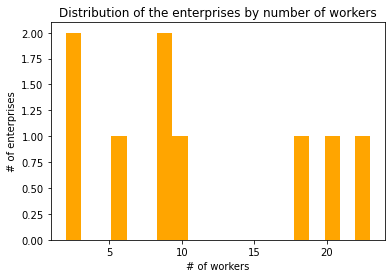

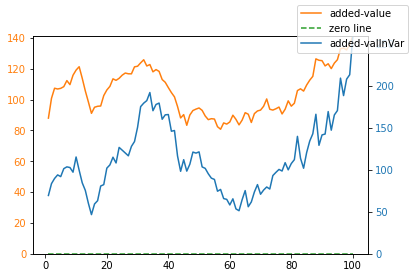

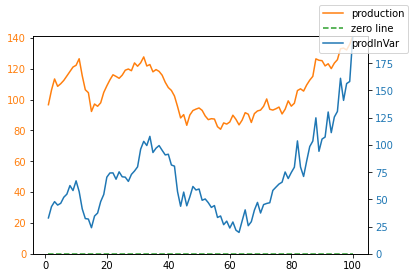

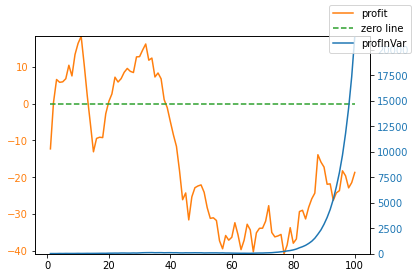

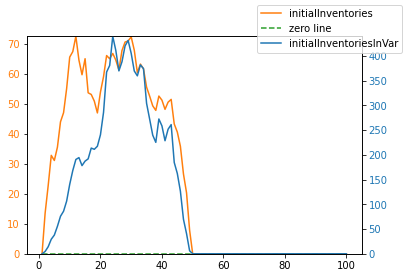

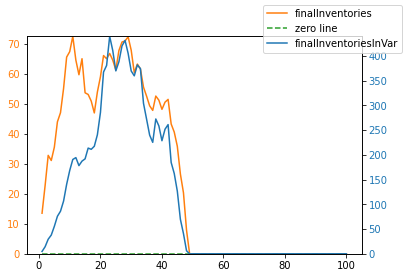

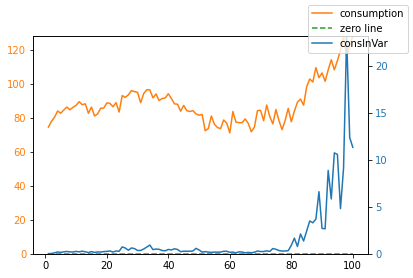

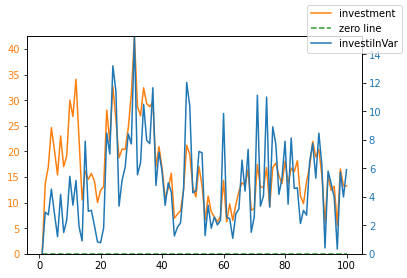

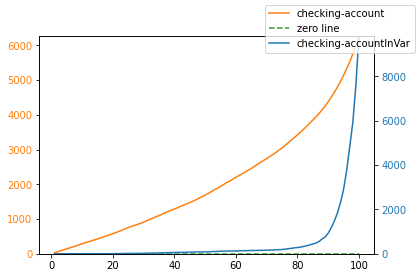

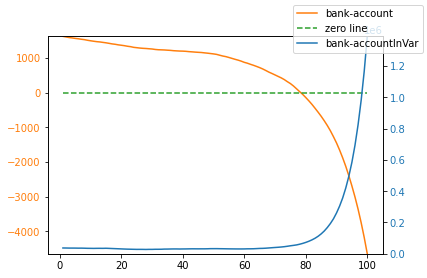

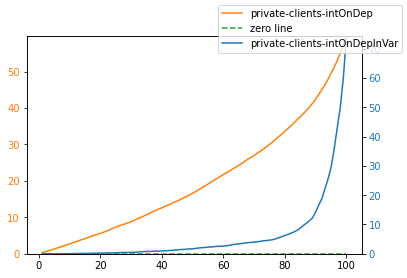

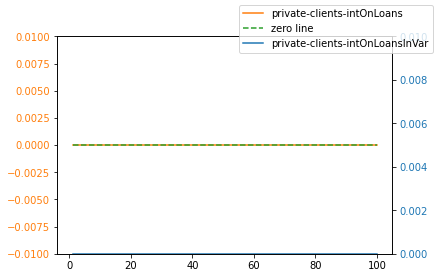

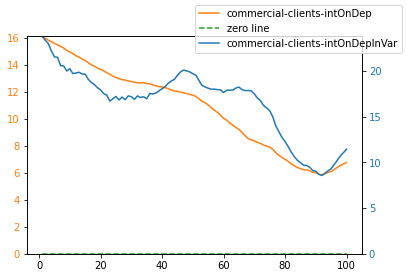

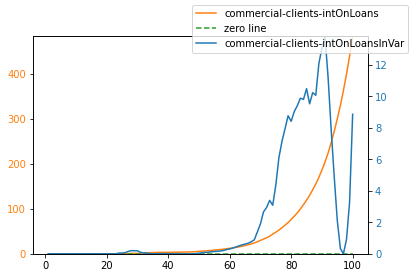

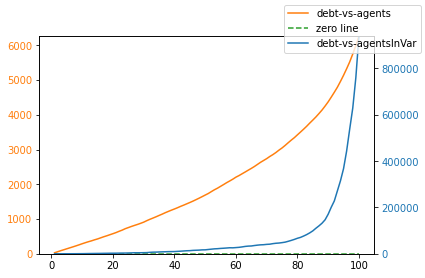

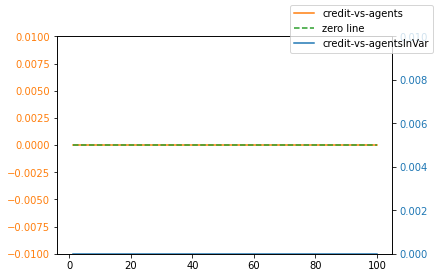

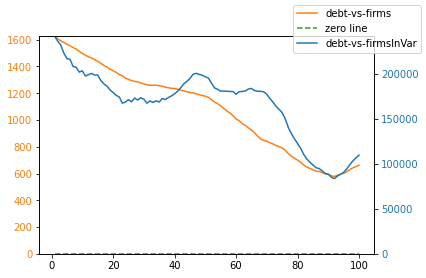

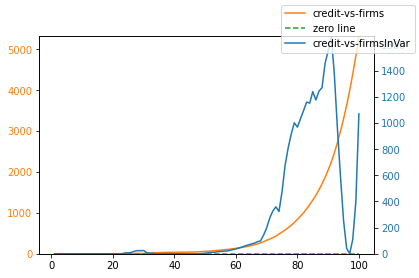

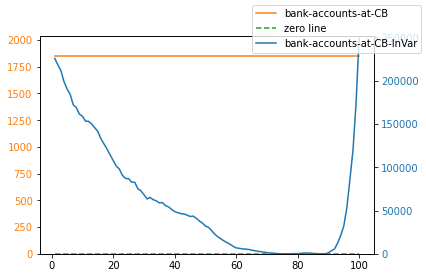

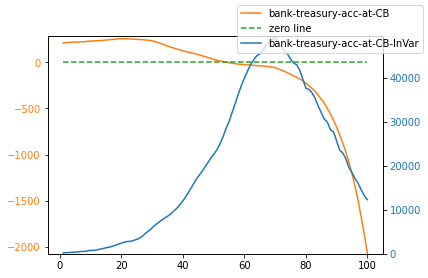

In [8]:
# the seed must be in range -2147483648 to 2147483647
r.seed(12345)

generateSeeds()

setup(r,cmv.functionSeedList[0])

cmv.actionList=["copyAccounts()","produceAll()","payWagesAll()",\
                "buyConsumptionOrInvestmentGoodsAll(r,cmv.functionSeedList[3])",\
                "computeAndApplyInterestsAll()","makeBalanceSheetAll()",\
                "distributeDividendAll()","accountCashMoneyAll()",\
                "accountCheckingAccountAll()","accountBankAccountAll()",\
                "makeBankFinancialAccountsAll()"\
                ]

for cmv.cycle in range(cmv.ncycles):
    for anAction in cmv.actionList:
            exec(anAction)

makeHist() 

nationalAccounts()

makePlots()


In [9]:
%run -i test


Last cycle test



AGENTS



Reconciliation of agents' financial accounts

+-----+---------------------------------------------------------+-------------+----------------+
|     |                                                         |   cycle 100 |                |
+=====+=========================================================+=============+================+
| (1) | agents' Deposits Previous Cycle                         |   5993.92   | bank stock (-) |
+-----+---------------------------------------------------------+-------------+----------------+
| (2) | agents' Deposits Current Cycle (with current interests) |   6257.92   | bank stock (+) |
+-----+---------------------------------------------------------+-------------+----------------+
| (3) | agents' Loans Previous Cycle                            |      0      | bank stock (+) |
+-----+---------------------------------------------------------+-------------+----------------+
| (4) | agents' Loans Current Cycle (with current i

<Figure size 432x288 with 0 Axes>